In [1]:
import numpy as np
import pandas as pd

Using dataset from MovieLens https://grouplens.org/datasets/movielens/#:~:text=MovieLens%201B%20is%20a%20synthetic%20dataset%20that%20is,which%20you%20must%20read%20using%20python%20and%20numpy.

In [2]:
ratings = pd.read_csv('ratings.csv')
print(ratings.shape)
ratings.head()


(25000095, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
columns=['title']
movies = pd.read_csv('movies.csv')
movies= movies.drop('genres', axis=1)
print(movies.shape)
movies.head()

(62423, 2)


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Had to limit the rows due to https://stackoverflow.com/questions/48492451/indexerror-index-1491188345-is-out-of-bounds-for-axis-0-with-size-1491089723

In [4]:
df = pd.merge(ratings, movies, on='movieId')
df = df[0:20000000]
df.head()

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)


## EDA

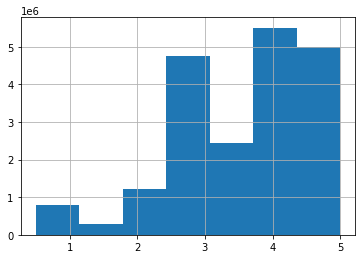

In [5]:
df['rating'].hist(bins=7)

In [6]:
df.groupby('movieId')['rating'].head()

0           5.0
1           5.0
2           4.0
3           4.0
4           4.0
           ... 
19999508    3.0
19999509    4.0
19999510    4.0
19999511    4.0
19999512    4.0
Name: rating, Length: 16090, dtype: float64

In [7]:
mean_rating=df.groupby('title')['rating'].mean().sort_values(ascending=False)
mean_rating.head()

ratings_stats = pd.DataFrame(df.groupby('title')['rating'].mean())

In [8]:
ratings_stats['ratings_count']= df.groupby('title')['rating'].count()
print(df.groupby('title')['rating'].count().sort_values(ascending=False))

title
Forrest Gump (1994)                                         81491
Shawshank Redemption, The (1994)                            81482
Pulp Fiction (1994)                                         79672
Silence of the Lambs, The (1991)                            74127
Matrix, The (1999)                                          72674
                                                            ...  
Gentle Breeze in the Village, A (Tennen kokekkô) (2007)         6
Journey to the Shore (2015)                                     6
Nanayo (Nanayomachi) (2008)                                     5
Inside The X-files (1998)                                       4
Alien Planet (2005)                                             1
Name: rating, Length: 3219, dtype: int64


In [9]:
pivottable=df.pivot_table(index='userId', columns='title', values='rating')

In [10]:
pivottable.head()

title,$5 a Day (2008),'Round Midnight (1986),"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 (1979),10 Rillington Place (1971),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),...,Your Friends and Neighbors (1998),Z (1969),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zombieland (2009),Zoolander (2001),Zootopia (2016),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.5,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Find Pearson correlation between user ratings for a movie and other movies. Deault axis is 0 for corrwith.

In [11]:
pfmovieratings=pivottable['Pulp Fiction (1994)']
swmovieratings=pivottable['Star Wars: Episode IV - A New Hope (1977)']

pfcorr=pivottable.corrwith(pfmovieratings)
swcorr=pivottable.corrwith(swmovieratings)

C:\Users\John Mathew\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\John Mathew\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [12]:
pf_recomm= pd.DataFrame(pfcorr, columns=['Correlation'])
pf_recomm.dropna(inplace=True)
pf_recomm.head()

,Correlation
title,
$5 a Day (2008),0.334854
'Round Midnight (1986),-0.038866
"'burbs, The (1989)",0.091012
(500) Days of Summer (2009),0.187656
...And Justice for All (1979),0.125469


In [13]:
pf_recomm.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Pulp Fiction (1994),1.000000
"Crying Out Love in the Center of the World (Sekai no chûshin de, ai o sakebu) (2004)",0.708005
Confidentially Yours (Vivement dimanche!) (1983),0.636998
Beyond Outrage (2012),0.564044
Crossing the Bridge: The Sound of Istanbul (2005),0.559607
The Garden of Sinners - Chapter 5: Paradox Paradigm (2008),0.555980
Ichi (2008),0.547047
Les Héritiers (2014),0.534522
Reservoir Dogs (1992),0.522396


In [14]:
# filter out based movies having low number of ratings

pf_recomm=pf_recomm.join(ratings_stats['ratings_count'])
pf_recomm.head(10)

,Correlation,ratings_count
title,,
$5 a Day (2008),0.334854,42
'Round Midnight (1986),-0.038866,188
"'burbs, The (1989)",0.091012,3320
(500) Days of Summer (2009),0.187656,11498
...And Justice for All (1979),0.125469,1120
10 (1979),0.077084,740
10 Rillington Place (1971),0.250432,160
10 Things I Hate About You (1999),-0.009713,13710
101 Dalmatians (1996),-0.011261,8825


## Recommendations for Pulp Fiction

In [20]:
pf_recomm[pf_recomm['ratings_count']> 1000].sort_values('Correlation', ascending=False).head()

,Correlation,ratings_count
title,,
Pulp Fiction (1994),1.000000,79672
Reservoir Dogs (1992),0.522396,34634
Kill Bill: Vol. 1 (2003),0.477718,33827
Kill Bill: Vol. 2 (2004),0.460249,28502
Inglourious Basterds (2009),0.387276,23077


In [15]:
sw_recomm= pd.DataFrame(swcorr, columns=['Correlation'])
sw_recomm.dropna(inplace=True)
sw_recomm.head()

,Correlation
title,
$5 a Day (2008),0.063123
'Round Midnight (1986),0.338473
"'burbs, The (1989)",0.088096
(500) Days of Summer (2009),0.136017
...And Justice for All (1979),0.092032


In [16]:
sw_recomm.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Star Wars: Episode IV - A New Hope (1977),1.000000
Inside The X-files (1998),1.000000
Journey to the Shore (2015),0.868599
Star Wars: Episode V - The Empire Strikes Back (1980),0.810687
Nanayo (Nanayomachi) (2008),0.764471
Star Wars: Episode VI - Return of the Jedi (1983),0.743540
Oro (2017),0.635999
The Garden of Sinners - Chapter 7: ……not nothing heart. (Murder Speculation Part B) (2009),0.575259
Ghost in the Shell: The New Movie (2015),0.565185


## Recommendations for Star Wars

In [21]:
sw_recomm=sw_recomm.join(ratings_stats['ratings_count'])
sw_recomm[sw_recomm['ratings_count']> 1000].sort_values('Correlation', ascending=False).head()

,Correlation,ratings_count
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,68717
Star Wars: Episode V - The Empire Strikes Back (1980),0.810687,57361
Star Wars: Episode VI - Return of the Jedi (1983),0.743540,54917
Star Wars: Episode VII - The Force Awakens (2015),0.528199,12678
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.523154,54675
